## Processing a classification dataset

The dataset which will be used can be found here [Titanic](https://www.kaggle.com/competitions/titanic).

Main goal is to improve the general classification result which is defined as accuracy 

There will be: 
1. Checking the accuracy before applaing any preprocessing algorithms
2. Analyzing our data
3. Using preprocessing algorithms:

3.1 First attempt
- Feature normalization
- Feature selection  
- Feature extraction

3.2 Second attempt
- Feature normalization
- Feature extraction
- Feature selection  

4. Comparing the results

In [25]:
### libraries
import umap
from sklearn.feature_selection import  GenericUnivariateSelect, chi2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import numpy as np
import pandas as pd
import classification as clas
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# reading the data
data = pd.read_csv('train.csv')
train_df, test_df = clas.getTwoDatasets(data)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,NaN,S
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
531,532,0,3,"Toufik, Mr. Nakli",male,NaN,0,0,2641,7.2292,NaN,C
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C


**1.Checking the accuracy**

In [27]:
# checking the initial accuarcy
pd.options.mode.copy_on_write = True

X_train = train_df[['Pclass','Age','Fare','Sex']]
X_train['Sex'] = X_train.Sex.copy().apply(lambda x : 1.0 if x == 'male' else 2.0).copy()
X_train = X_train.fillna(0)
y_train = train_df['Survived']

X_test = test_df[['Pclass','Age','Fare','Sex']]
X_test.Sex = X_test.Sex.apply(lambda x : 1.0 if x == 'male' else 2.0)
X_test = X_test.fillna(0)
y_test = test_df['Survived']

acc = clas.getAccuracy(X_train, y_train,X_test, y_test)
print("Accuracy before preprocessing: ", acc)

before = [acc,acc,acc]

Accuracy before preprocessing:  0.6974789915966386


**2.Analyzing our data**

In [28]:
dataFrameTypes = clas.printVariableType(train_df)
dataFrameTypes

,Column,Variable_Type,the percentage values of unique values
0,PassengerId,int64 (discrete),1.000
1,Survived,int64 (discrete),0.004
2,Pclass,int64 (discrete),0.006
3,Name,object (caterogical),1.000
4,Sex,object (caterogical),0.004
5,Age,float64 (continuous),0.144
6,SibSp,int64 (discrete),0.013
7,Parch,int64 (discrete),0.011
8,Ticket,object (caterogical),0.835
9,Fare,float64 (continuous),0.375


#### 3.1 First attempt

In [29]:
### NORMALIZATION
attempt_1=[]
## training set
clas.changeNullValuesToMean(train_df)
# clas.changeNullValuesToNewValue(train_df)
clas.changeNameToSurname(train_df, 'Name')
clas.changeCaterogicalToDescrite(train_df)
clas.changeContinuousToDescrite(train_df)
normalized_data = clas.normalizeData(train_df, 'Survived')

# ## test set
clas.changeNullValuesToMean(test_df)
# # clas.changeNullValuesToNewValue(test_df)
clas.changeNameToSurname(test_df, 'Name')
clas.changeCaterogicalToDescrite(test_df)
clas.changeContinuousToDescrite(test_df)
normalized_data_test = clas.normalizeData(test_df, 'Survived')

# #### ACCURACY AFTER ###############
X = normalized_data
y = train_df['Survived']

X_test = normalized_data_test
y_test = test_df['Survived']

acc =  clas.getAccuracy(X, y, X_test, y_test)
print("Accuracy after 1 step of preprocessing: ", acc)
attempt_1.append(acc)

Accuracy after 1 step of preprocessing:  0.7899159663865546


**3.2.Feature selection**


1. Normalization and standrization do not have any influence on corellation, therefore we do it on the initialy dataframe to see correlation between target value and other attribute too. (Notice, that the correlation values don't change if we do not apply normalization schema)

2. Instead of using variances to collect the best features we will use the ranking function ([f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif)). This method calculates the F coefficients and p-values for each feature in the context of classification. The higher the F coefficient, the more significant the feature is for classification

Accuracy after 2 step of preprocessing:  0.803921568627451


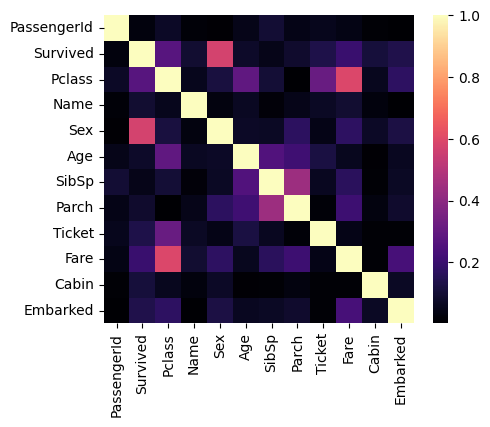

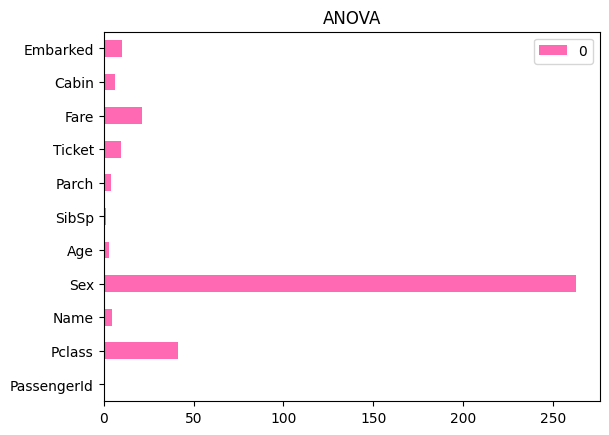

In [30]:
### Feature selection

# heatmap
plt.figure(figsize=(5,4))
sns.heatmap(abs(train_df.corr()), cmap='magma')

# anova plot
anova_df = clas.computeAnova(normalized_data, train_df['Survived'])
anova_df.plot(kind='barh', title='ANOVA', color=['hotpink'])

# droping choosen columns
clas.dropColumns(normalized_data, ['Sex', 'Fare', 'Pclass', 'Survived', 'Embarked', 'Ticket', 'Cabin'])
clas.dropColumns(normalized_data_test, ['Sex', 'Fare', 'Pclass', 'Survived', 'Embarked', 'Ticket', 'Cabin'])

#### ACCURACY AFTER ###############

X = normalized_data
y = train_df['Survived']

X_test = normalized_data_test
y_test = test_df['Survived']

acc = clas.getAccuracy(X, y, X_test, y_test)
print("Accuracy after 2 step of preprocessing: ", acc )
attempt_1.append(acc)

In [31]:
## It does not show anything important, delete?


# gus_object = GenericUnivariateSelect(chi2, mode='k_best', param=4)  

# new_data = gus_object.fit_transform(normalized_data, train_df['Survived'])
# new_dataframe = pd.DataFrame(new_data, columns=gus_object.get_feature_names_out())
# # print(new_dataframe) # we now all possible columns to choose

# plt.plot(new_dataframe[new_dataframe.columns[0]][train_df['Survived'] == 0], new_dataframe[new_dataframe.columns[2]][train_df['Survived'] == 0], 'r.', label='Survived = 0')
# plt.plot(new_dataframe[new_dataframe.columns[0]][train_df['Survived'] == 1], new_dataframe[new_dataframe.columns[2]][train_df['Survived'] == 1], 'g.', label='Survived = 1')
# plt.xlabel(gus_object.get_feature_names_out()[0])
# plt.ylabel(gus_object.get_feature_names_out()[2])
# plt.legend()
# plt.show()

Summary:
+ From heatmap, we can get info that the 'Sex' and 'Survived' are high correleted. Results from ANOVA test confirms that 'Sex' and 'Survived' are connected and additionaly the plot chows that also 'Pclass', 'Fare', 'Embarked' are good for our classification task.
- The last plot is not good, because we do not have much continuous values, therfore it mostly makes 2 or 4 points on the plot only

In [32]:
### Feature extraction

## It does not show anything important, delete?

# sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
# df = pd.DataFrame(train_df, columns=train_df.columns.tolist())
# sns.pairplot(df, hue='Survived')

y = train_df['Survived']
X = normalized_data

lda = LDA(n_components=1) 
X = lda.fit_transform(X, y)
X_test = lda.transform(normalized_data_test)

#### AFTER  SELECTION ####################### CORRECT?

y = train_df['Survived']
y_test = test_df['Survived']

acc = clas.getAccuracy(X, y, X_test, y_test)
print("Accuracy after 1 step of preprocessing: ", acc )
attempt_1.append(acc)

Accuracy after 1 step of preprocessing:  0.7871148459383753


Summary:
- I changed the UMAP to LDA, because it is mainly for classification. Unfortunately I can not change the component to any other number. Luckly when I use this we have bigger accuracy than with UMAP

#### 3.2 Second attempt

In [33]:
# reading the data
data = pd.read_csv('train.csv')
train_df, test_df = clas.getTwoDatasets(data)
attempt_2 = []
### NORMALIZATION

## training set
# clas.changeNullValuesToMean(train_df)
clas.changeNullValuesToNewValue(train_df)
clas.changeNameToSurname(train_df, 'Name')
clas.changeCaterogicalToDescrite(train_df)
clas.changeContinuousToDescrite(train_df)
normalized_data = clas.normalizeData(train_df, 'Survived')

# ## test set
# clas.changeNullValuesToMean(test_df)
clas.changeNullValuesToNewValue(test_df)
clas.changeNameToSurname(test_df, 'Name')
clas.changeCaterogicalToDescrite(test_df)
clas.changeContinuousToDescrite(test_df)
normalized_data_test = clas.normalizeData(test_df, 'Survived')

X = normalized_data
y = train_df['Survived']

X_test = normalized_data_test
y_test = test_df['Survived']

acc = clas.getAccuracy(X, y, X_test, y_test)
print("Accuracy after 1 step of preprocessing: ", acc)
attempt_2.append(acc)

Age was with NaN values
Cabin was with NaN values
Age was with NaN values
Cabin was with NaN values
Accuracy after 1 step of preprocessing:  0.7843137254901961


Summary: the same as earlier nothing new

PCA components:  [[ 3.29772078e-02 -5.63704386e-01 -5.72376971e-02 -7.26936005e-01
   8.51706011e-04 -5.50523854e-04  4.20701116e-02 -1.78568071e-01
   1.66000220e-01 -2.63041345e-01 -1.37961804e-01]
 [ 7.55112604e-02 -6.04706238e-01 -9.01817300e-03  6.66512028e-01
   1.73117512e-01 -5.15892869e-02 -5.51705668e-02 -2.13307406e-01
   1.18255792e-01 -2.92867979e-01 -5.81184140e-02]
 [-1.30074677e-01 -8.60165078e-02 -4.43299826e-01  1.13471415e-01
  -8.20312194e-01  6.99899002e-02  1.23166765e-01 -1.12200932e-01
   4.59096302e-02 -5.11707180e-02  2.36633307e-01]
 [-8.76425255e-01 -1.00773389e-01  5.25813201e-02  4.75540455e-02
   1.83209339e-02  4.72267647e-02  1.09843798e-02  3.59482592e-01
   8.95421948e-02 -8.41350824e-02 -2.63981784e-01]]
Accuracy after preprocessing:  0.7843137254901961


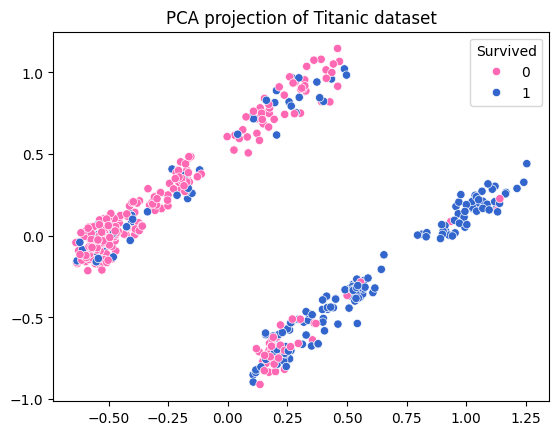

In [34]:
### FEATURE EXTRACTION

y = train_df['Survived']
y_test = test_df['Survived']

X_pca, X_pca_test, pca_df, pca_df_test = clas.computePCA(normalized_data, normalized_data_test)

sns.scatterplot(data=train_df, x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette = ['hotpink', '#3366CC']).set_title('PCA projection of Titanic dataset')
acc = clas.getAccuracy(X_pca, y, X_pca_test, y_test)
print("Accuracy after preprocessing: ", acc)
attempt_2.append(acc)


Summary: We use PCA for 4 components and it provides us
- **dimensionality reduction** which let transforms the original dataset into a smaller set of attributes ( features) where retain most of the variance in the data. It helps to avoid overfitting in high dimensional dataset such as us and let us make faster computation od this set in future 
- **noise reduction** which help to reduce the impact of noisy(irrelevant) features on the classification task. Therefore selected feature space caontain the most information

Our accuracy does not increased but our data is ready for further work :)

<AxesSubplot: title={'center': 'ANOVA'}>

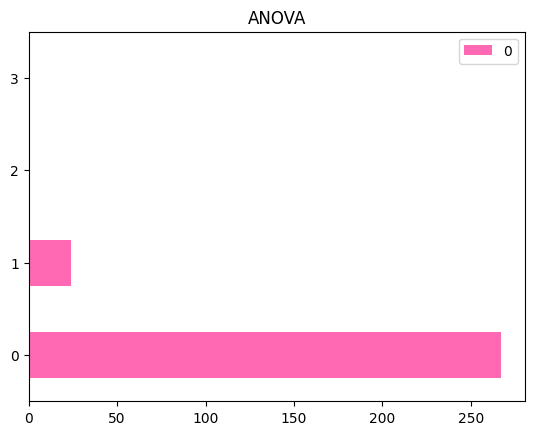

In [35]:
anova_df = clas.computeAnova(pca_df, train_df['Survived'])
anova_df.plot(kind='barh', title='ANOVA', color=['hotpink'])

# pca_df.columns.to_list()

In [36]:
clas.dropColumns(pca_df, [0])
clas.dropColumns(pca_df_test, [0])

X = pca_df
y = train_df['Survived']

X_test = pca_df_test
y_test = test_df['Survived']

acc = clas.getAccuracy(X, y, X_test, y_test)
print("Accuracy after preprocessing: ", acc)
attempt_2.append(acc)

Accuracy after preprocessing:  0.8207282913165266


Summary: then we do ANOVA test as ealier
- from all 4 componentes the most important are '0', therefore we leave them in our dataset and drop others
- our accuracy increased :)

#### 3.3 Third attempt ( poprosze o sprawdzenie czy o to chodziło)

Now we will use ***cross validation*** (It is used to assess the performance of a model when a separate test set is not available. The basic idea is to split the available data into a training set and a test set multiple times (k times). Then, the model is trained on the training subset and tested on the test subset for each of these splits)

Age was with NaN values
Cabin was with NaN values
0.7716981132075472


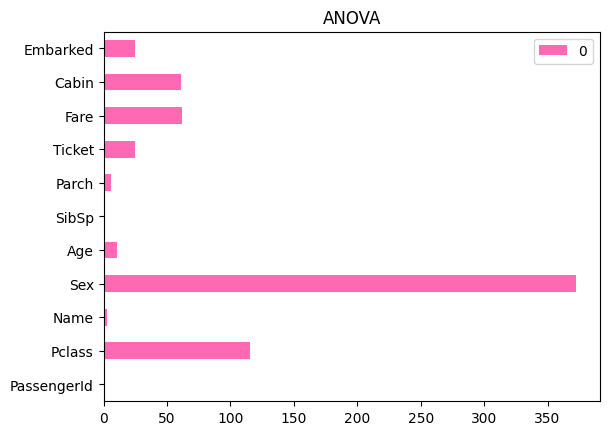

In [37]:
data = pd.read_csv('train.csv')
attempt_3 = []

clas.changeNullValuesToNewValue(data)
clas.changeNameToSurname(data, 'Name')
clas.changeCaterogicalToDescrite(data)
clas.changeContinuousToDescrite(data)
normalized_data = clas.normalizeData(data, 'Survived')

anova_df = clas.computeAnova(normalized_data, data['Survived'])
anova_df.plot(kind='barh', title='ANOVA', color=['hotpink'])
clas.dropColumns(normalized_data, ['Sex', 'Fare', 'Pclass', 'Survived', 'Embarked', 'Ticket', 'Cabin'])

lda = LDA(n_components=1) 
X = lda.fit_transform(X, y)

acc = np.mean(clas.testing(X,data['Survived']))
print(acc)
attempt_3.append(acc)
attempt_3.append(acc)
attempt_3.append(acc)


ALL RESULTS:

In [38]:
results = {'Attempt 1': attempt_1,
        'Attempt 2': attempt_2,
        'Attempt 3': attempt_3}
        
results_df = pd.DataFrame(results)
results_df.index = ['1 step (normalization)', '2 step', '3 step']
results_df

,Attempt 1,Attempt 2,Attempt 3
1 step (normalization),0.789916,0.784314,0.771698
2 step,0.803922,0.784314,0.771698
3 step,0.787115,0.820728,0.771698
